In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

### Logistic Regression Model

The logistic regression model is used to model the posterior probabilities of $ K $ classes through linear functions of $ x $, while ensuring that these probabilities sum to one and stay within the range $[0, 1]$.

The model for class $ k $ is expressed in terms of log-odds (logit transformations) as:

$$
\log \left( \frac{\Pr(G = 1 \mid X = x)}{\Pr(G = K \mid X = x)} \right) = \beta_{10} + \beta_1^T x
$$

$$
\log \left( \frac{\Pr(G = 2 \mid X = x)}{\Pr(G = K \mid X = x)} \right) = \beta_{20} + \beta_2^T x
$$

$$
\vdots
$$

$$
\log \left( \frac{\Pr(G = K-1 \mid X = x)}{\Pr(G = K \mid X = x)} \right) = \beta_{(K-1)0} + \beta_{K-1}^T x
$$

### Probability Calculation

The probability for class $ k $ is computed as:

$$
\Pr(G = k \mid X = x) = \frac{\exp(\beta_{k0} + \beta_k^T x)}{1 + \sum_{\ell=1}^{K-1} \exp(\beta_{\ell 0} + \beta_{\ell}^T x)} \quad \text{for} \, k = 1, 2, \dots, K-1
$$

For the last class $ K $:

$$
\Pr(G = K \mid X = x) = \frac{1}{1 + \sum_{\ell=1}^{K-1} \exp(\beta_{\ell 0} + \beta_{\ell}^T x)}
$$

These probabilities sum to one:

$$
\sum_{k=1}^{K} \Pr(G = k \mid X = x) = 1
$$

### Parameter Set

The parameter set for the model is:

$$
\theta = \{ \beta_{10}, \beta_1^T, \dots, \beta_{(K-1)0}, \beta_{K-1}^T \}
$$

For $ K = 2 $, the model simplifies to the binary logistic regression case:

$$
\log \left( \frac{\Pr(G = 1 \mid X = x)}{\Pr(G = 2 \mid X = x)} \right) = \beta_{10} + \beta_1^T x
$$

This is widely used for binary classification tasks.


### Fitting Logistic Regression Models

Logistic regression models are typically fit using **maximum likelihood estimation** (MLE), where the likelihood is derived from the conditional distribution of $ G $ given $ X $.

Since $ \Pr(G \mid X) $ defines the entire conditional distribution, the **multinomial distribution** is appropriate for $ K $-class classification. The **log-likelihood** for $ N $ observations is:

$$
\ell(\theta) = \sum_{i=1}^{N} \log p_{g_i}(x_i; \theta)
$$

where $ p_k(x_i; \theta) = \Pr(G = k \mid X = x_i; \theta) $.

#### Two-Class Case

For the two-class case, it is convenient to recode the classes $ g_i $ as a binary response $ y_i $ such that:

$$
y_i = \begin{cases} 
1, & \text{if } g_i = 1 \\
0, & \text{if } g_i = 2 
\end{cases}
$$

Let:

$$
p_1(x; \theta) = p(x; \theta) \quad \text{and} \quad p_2(x; \theta) = 1 - p(x; \theta)
$$

The log-likelihood function for the two-class case becomes:

$$
\ell(\beta) = \sum_{i=1}^{N} \left[ y_i \log p(x_i; \beta) + (1 - y_i) \log(1 - p(x_i; \beta)) \right]
$$

Substituting the logistic function $ p(x_i; \beta) = \frac{1}{1 + \exp(-\beta^T x_i)} $, we can write the log-likelihood as:

$$
\ell(\beta) = \sum_{i=1}^{N} \left[ y_i \beta^T x_i - \log(1 + \exp(\beta^T x_i)) \right]
$$

where $ \beta = \{\beta_{10}, \beta_1\} $, and $ x_i $ includes a constant term for the intercept.

### Derivatives for Optimization

To maximize the log-likelihood, we compute its gradient (score) and set it to zero. The **score equations** are given by:

$$
\frac{\partial \ell(\beta)}{\partial \beta} = \sum_{i=1}^{N} x_i \left( y_i - p(x_i; \beta) \right) = 0
$$

This represents $ p + 1 $ nonlinear equations in $ \beta $. The first score equation ensures that the expected number of class 1 samples equals the observed number, i.e., the sum of probabilities matches the actual counts.

### Newton-Raphson Algorithm

To solve the score equations, we use the **Newton-Raphson algorithm**, which requires the second derivative (Hessian) of the log-likelihood. The Hessian matrix is:

$$
\frac{\partial^2 \ell(\beta)}{\partial \beta \partial \beta^T} = - \sum_{i=1}^{N} x_i x_i^T p(x_i; \beta)(1 - p(x_i; \beta))
$$

Starting with an initial estimate $ \beta^{\text{old}} $, the Newton-Raphson update is:

$$
\beta^{\text{new}} = \beta^{\text{old}} - \left( \frac{\partial^2 \ell(\beta)}{\partial \beta \partial \beta^T} \right)^{-1} \frac{\partial \ell(\beta)}{\partial \beta}
$$

where the derivatives are evaluated at $ \beta^{\text{old}} $.

### Matrix Notation for Score and Hessian

It is convenient to write the score and Hessian for logistic regression in **matrix form**. Let:

- $\mathbf{y} $ denote the vector of $ y_i $ values.
- $ \mathbf{X} $ be the $ N \times (p+1) $ matrix of $ x_i $ values.
- $ \mathbf{p} $ be the vector of fitted probabilities, with the $ i $-th element as $ p(x_i; \beta^{\text{old}}) $.
- $ \mathbf{W} $ be an $ N \times N $ diagonal matrix of weights, where the $ i $-th diagonal element is $ p(x_i; \beta^{\text{old}})(1 - p(x_i; \beta^{\text{old}})) $.

Then, we can express the score as:

$$
\frac{\partial \ell(\beta)}{\partial \beta} = \mathbf{X}^T (\mathbf{y} - \mathbf{p})
\tag{4.24}
$$

The Hessian is:

$$
\frac{\partial^2 \ell(\beta)}{\partial \beta \partial \beta^T} = - \mathbf{X}^T \mathbf{W} \mathbf{X}
\tag{4.25}
$$

### Newton Step

The **Newton step** for updating $ \beta $ is given by:

$$
\beta^{\text{new}} = \beta^{\text{old}} + (\mathbf{X}^T \mathbf{W} \mathbf{X})^{-1} \mathbf{X}^T (\mathbf{y} - \mathbf{p})
$$

We can rewrite this as:

$$
\beta^{\text{new}} = (\mathbf{X}^T \mathbf{W} \mathbf{X})^{-1} \mathbf{X}^T \mathbf{W} \mathbf{X} \beta^{\text{old}} + \mathbf{W}^{-1} (\mathbf{y} - \mathbf{p})
$$

Or, equivalently:

$$
\beta^{\text{new}} = (\mathbf{X}^T \mathbf{W} \mathbf{X})^{-1} \mathbf{X}^T \mathbf{W} \mathbf{z}
\tag{4.26}
$$

where $ \mathbf{z} $ is the **adjusted response**:

$$
\mathbf{z} = \mathbf{X} \beta^{\text{old}} + \mathbf{W}^{-1} (\mathbf{y} - \mathbf{p})
\tag{4.27}
$$

### Iteratively Reweighted Least Squares (IRLS)

This procedure is called **iteratively reweighted least squares (IRLS)** because each iteration solves a weighted least squares problem. The update for $ \beta $ is:

$$
\beta^{\text{new}} \leftarrow \arg \min_{\beta} (\mathbf{z} - \mathbf{X} \beta)^T \mathbf{W} (\mathbf{z} - \mathbf{X} \beta)
\tag{4.28}
$$

Typically, $ \beta = 0 $ is used as the starting point for the iterations. While convergence is usually achieved due to the concave nature of the log-likelihood, step size halving may be needed in rare cases to prevent overshooting.

### Multiclass Case (K ≥ 3)

For the multiclass case, the Newton algorithm can be similarly expressed as an **iteratively reweighted least squares** algorithm, but with a vector of $ K - 1$ responses and a non-diagonal weight matrix for each observation. This prevents simplified algorithms, and it is often more convenient to work with the expanded vector $ \theta $ directly.

Alternatively, **coordinate-descent methods** can be used to maximize the log-likelihood efficiently, as implemented in the **R package `glmnet`** (Friedman et al., 2010), which is efficient even for large logistic regression problems.


### Table 2: Results from a Logistic Regression Fit to the South African Heart Disease Data

| Coefficient    | Std. Error | Z Score |
|----------------|------------|---------|
| (Intercept)    | -4.130     | 0.964   | -4.285  |
| sbp            | 0.006      | 0.006   | 1.023   |
| tobacco        | 0.080      | 0.026   | 3.034   |
| ldl            | 0.185      | 0.057   | 3.219   |
| famhist        | 0.939      | 0.225   | 4.178   |
| obesity        | -0.035     | 0.029   | -1.187  |
| alcohol        | 0.001      | 0.004   | 0.136   |
| age            | 0.043      | 0.010   | 4.184   |

In explaining the outcome, typically many models are fit in a search for a parsimonious model involving a subset of the variables, possibly with some interaction terms. The following example illustrates some of the issues involved.


Coefficients: [-0.4586029  -0.58402786 -1.62696458  2.77122672  1.21264819]
Accuracy: 1.0


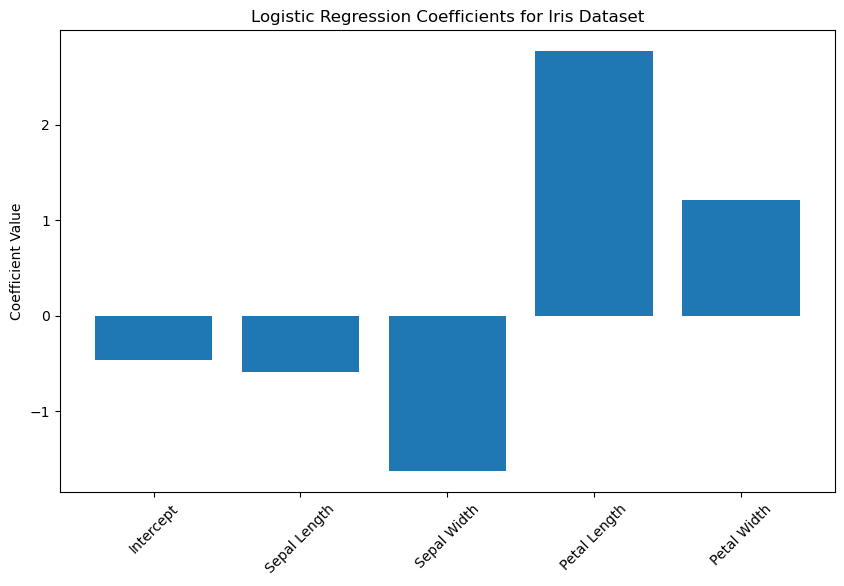

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Modified Iris dataset (Only two species for binary classification)
data = [
    {'sepal_length': 5.1, 'sepal_width': 3.5, 'petal_length': 1.4, 'petal_width': 0.2, 'species': 0},  # Iris-setosa
    {'sepal_length': 4.9, 'sepal_width': 3.0, 'petal_length': 1.4, 'petal_width': 0.2, 'species': 0},  # Iris-setosa
    {'sepal_length': 4.7, 'sepal_width': 3.2, 'petal_length': 1.3, 'petal_width': 0.2, 'species': 0},  # Iris-setosa
    {'sepal_length': 7.0, 'sepal_width': 3.2, 'petal_length': 4.7, 'petal_width': 1.4, 'species': 1},  # Iris-versicolor
    {'sepal_length': 6.4, 'sepal_width': 3.2, 'petal_length': 4.5, 'petal_width': 1.5, 'species': 1},  # Iris-versicolor
    {'sepal_length': 6.9, 'sepal_width': 3.1, 'petal_length': 4.9, 'petal_width': 1.5, 'species': 1},  # Iris-versicolor
    {'sepal_length': 5.6, 'sepal_width': 2.7, 'petal_length': 4.2, 'petal_width': 1.3, 'species': 1},  # Iris-versicolor
]

# Convert data to numpy arrays
X = np.array([[1] + [row['sepal_length'], row['sepal_width'], row['petal_length'], row['petal_width']] for row in data])  # Add intercept term
y = np.array([row['species'] for row in data])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log-likelihood function
def log_likelihood(X, y, beta):
    linear_model = np.dot(X, beta)
    return np.sum(y * linear_model - np.log(1 + np.exp(linear_model)))

# Gradient of the log-likelihood function
def gradient(X, y, beta):
    linear_model = np.dot(X, beta)
    predictions = sigmoid(linear_model)
    return np.dot(X.T, (y - predictions))

# Fit logistic regression model using gradient descent
def fit_logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    beta = np.zeros(X.shape[1])  # Initialize coefficients
    for _ in range(iterations):
        grad = gradient(X, y, beta)
        beta += learning_rate * grad  # Update coefficients
    return beta

# Fit the model
beta_estimates = fit_logistic_regression(X, y)

# Print coefficients
print("Coefficients:", beta_estimates)

# Make predictions
def predict(X, beta):
    probabilities = sigmoid(np.dot(X, beta))
    return [1 if p >= 0.5 else 0 for p in probabilities]

# Predictions on training data
predictions = predict(X, beta_estimates)

# Calculate accuracy
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

# Visualize the coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(beta_estimates)), beta_estimates)
plt.title('Logistic Regression Coefficients for Iris Dataset')
plt.xticks(range(len(beta_estimates)), ['Intercept', 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], rotation=45)
plt.ylabel('Coefficient Value')
plt.show()


Final coefficients: [-0.18148319 -0.27923124 -1.04637619  1.59765645  0.68387811]


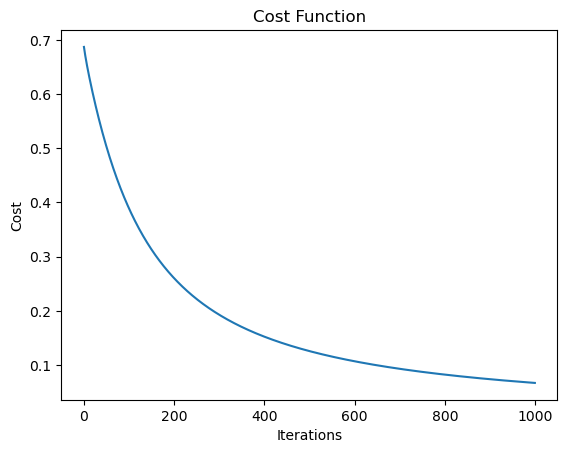

Accuracy: 100.00%


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for ease of manipulation
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Select only two classes for binary classification (Setosa and Versicolor)
df = df[df['target'] != 2]  # Remove the 'virginica' class
X = df.drop('target', axis=1).values
y = df['target'].values

# Convert target to 0 and 1
y = np.where(y == 0, 0, 1)  # Setosa = 0, Versicolor = 1

# Add a bias (intercept) term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))

# Gradient descent algorithm
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Initialize parameters
theta_initial = np.zeros(X.shape[1])
learning_rate = 0.01
iterations = 1000

# Fit the model using gradient descent
theta, cost_history = gradient_descent(X, y, theta_initial, learning_rate, iterations)

# Print the final coefficients
print("Final coefficients:", theta)

# Plot the cost function over iterations
plt.plot(cost_history)
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

# Make predictions
def predict(X, theta):
    probabilities = sigmoid(X @ theta)
    return np.where(probabilities >= 0.5, 1, 0)

# Predict the classes
predictions = predict(X, theta)

# Calculate accuracy
accuracy = np.mean(predictions == y) * 100
print(f'Accuracy: {accuracy:.2f}%')


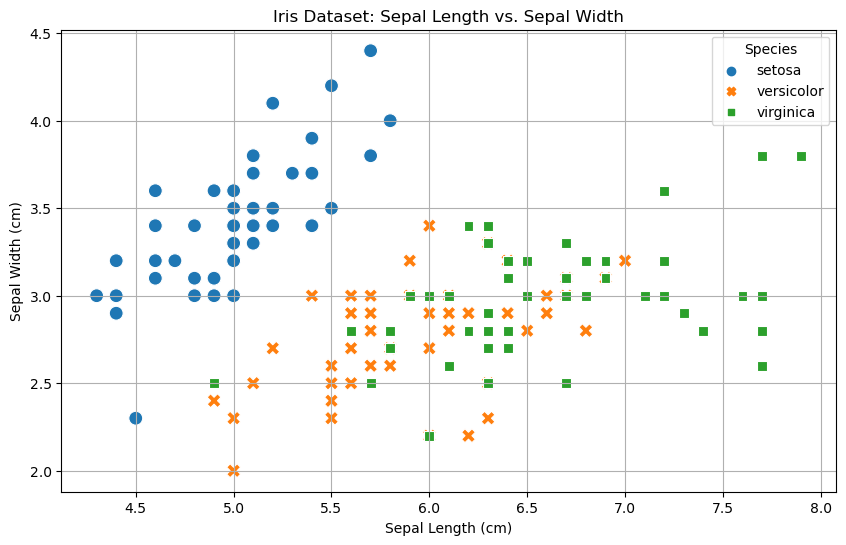

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target values to species names for better readability
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', style='species', s=100)

# Customize the plot
plt.title('Iris Dataset: Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()


<Figure size 1200x1000 with 0 Axes>

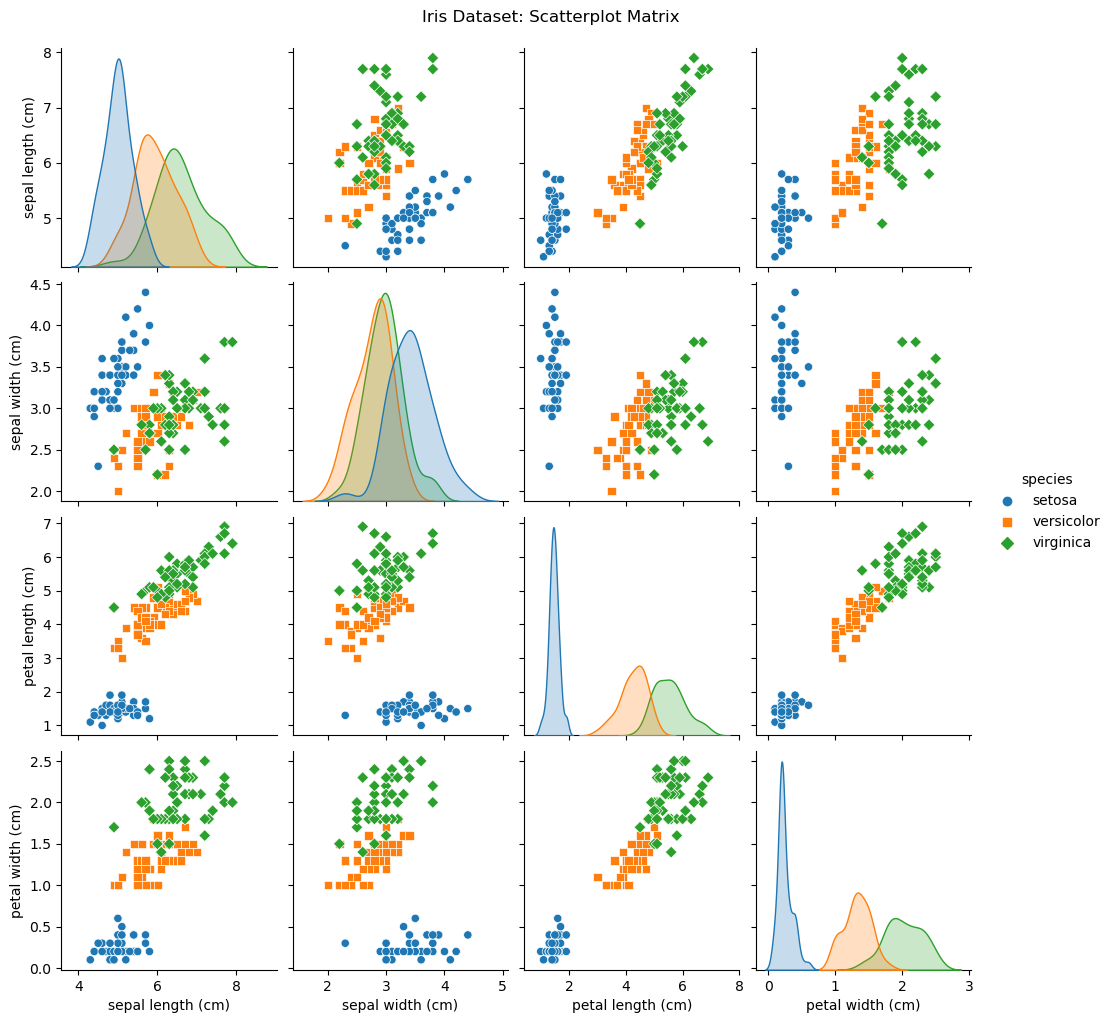

In [8]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map target values to species names for better readability
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Create a scatterplot matrix (pair plot)
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species', markers=["o", "s", "D"], diag_kind='kde')

# Customize the plot
plt.suptitle('Iris Dataset: Scatterplot Matrix', y=1.02)
plt.show()


## Quadratic Approximations and Inference

The maximum-likelihood parameter estimates $\hat{\beta}$ satisfy a self-consistency relationship: they are the coefficients of a weighted least squares fit, where the responses are 

$$
y_i - \hat{p}_i = z_i^T \hat{\beta} + \frac{(y_i - \hat{p}_i)}{\hat{p}_i (1 - \hat{p}_i)}
$$ 

and the weights are $w_i = \hat{p}_i (1 - \hat{p}_i)$, both depending on $\hat{\beta}$ itself. Apart from providing a convenient algorithm, this connection with least squares has more to offer:

- The weighted residual sum-of-squares is the familiar Pearson chi-square statistic 

$$
\sum_{i=1}^{N} \frac{(y_i - \hat{p}_i)^2}{\hat{p}_i (1 - \hat{p}_i)}
$$ 

which is a quadratic approximation to the deviance.

- Asymptotic likelihood theory says that if the model is correct, then $\hat{\beta}$ is consistent (i.e., converges to the true $\beta$).

- A central limit theorem then shows that the distribution of $\hat{\beta}$ converges to 

$$
N(\beta, (X^T W X)^{-1}).
$$ 

This and other asymptotics can be derived directly from the weighted least squares fit by mimicking normal theory inference.

- Model building can be costly for logistic regression models because each model fitted requires iteration. Popular shortcuts are the Rao score test, which tests for inclusion of a term, and the Wald test, which can be used to test for exclusion of a term. Neither of these requires iterative fitting, and they are based on the maximum-likelihood fit of the current model. It turns out that both of these amount to adding or dropping a term from the weighted least squares fit, using the same weights. Such computations can be done efficiently without recomputing the entire weighted least squares fit. 

Software implementations can take advantage of these connections. For example, the generalized linear modeling software in R (which includes logistic regression as part of the binomial family of models) exploits them fully. GLM (generalized linear model) objects can be treated as linear model objects, and all the tools available for linear models can be applied automatically.

## L1 Regularized Logistic Regression

The L1 penalty used in the lasso (Section 3.4.2) can be used for variable selection and shrinkage with any linear regression model. For logistic regression, we would maximize a penalized version of 

$$
\begin{align*}
\max_{\beta_0, \beta} & \sum_{i=1}^{N} \left[ y_i \left(\beta_0 + \beta^T x_i\right) - \log(1 + e^{\beta_0 + \beta^T x_i}) \right] - \lambda \sum_{j=1}^{p} |\beta_j|
\end{align*}
$$ 

As with the lasso, we typically do not penalize the intercept term and standardize the predictors for the penalty to be meaningful. Criterion (4.31) is concave, and a solution can be found using nonlinear programming methods (Koh et al., 2007, for example). 

Alternatively, using the same quadratic approximations that were used in the Newton algorithm in Section 4.4.1, we can solve (4.31) by repeated application of a weighted lasso algorithm. Interestingly, the score equations for the variables with non-zero coefficients have the form 

$$
x_j^T (y - p) = \lambda \cdot \text{sign}(\beta_j),
$$ 

which generalizes (3.58) in Section 3.4.4; the active variables are tied in their generalized correlation with the residuals. Path algorithms such as LAR for lasso are more difficult because the coefficient profiles are piecewise smooth rather than linear. Nevertheless, progress can be made using quadratic approximations.


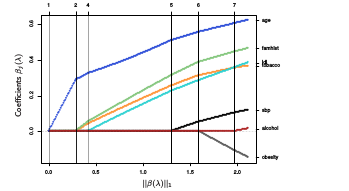

Fig. 13. L1 regularized logistic regression coeﬃcients for the South African heart disease data, plotted as a function of the L1 norm. The variables were all standardized to have unit variance. The proﬁles are computed exactly at each of the plotted points.

Iteration 0: Loss = 69.3059
Iteration 100: Loss = 69.0306
Iteration 200: Loss = 68.8512
Iteration 300: Loss = 68.7529
Iteration 400: Loss = 68.6919
Iteration 500: Loss = 68.6501
Iteration 600: Loss = 68.6215
Iteration 700: Loss = 68.6136
Iteration 800: Loss = 68.6057
Iteration 900: Loss = 68.5947


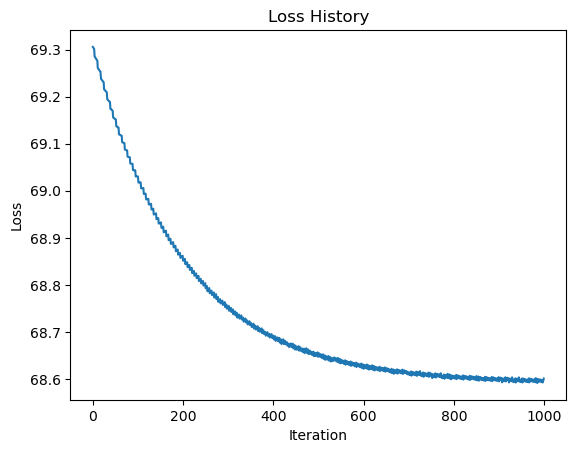

Final weights: [-0.22077479 -0.00068666  0.0002428 ]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility
N = 100  # Number of samples
X = np.random.rand(N, 2)  # 2 features
true_weights = np.array([1.5, -2.0])  # True weights for the logistic model
y_prob = 1 / (1 + np.exp(-np.dot(X, true_weights)))  # Logistic function
y = np.random.binomial(1, y_prob)  # Generate binary target variable

# Step 2: Define the logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 3: Define the loss function with L1 regularization
def loss_function(X, y, weights, lambda_):
    N = X.shape[0]
    predictions = sigmoid(np.dot(X, weights))
    log_likelihood = np.sum(y * np.log(predictions + 1e-10) + (1 - y) * np.log(1 - predictions + 1e-10))
    l1_penalty = lambda_ * np.sum(np.abs(weights[1:]))  # L1 penalty for weights (not intercept)
    return -log_likelihood + l1_penalty

# Step 4: Gradient of the loss function
def gradient(X, y, weights, lambda_):
    predictions = sigmoid(np.dot(X, weights))
    errors = predictions - y
    grad = np.dot(X.T, errors) / y.size
    grad[1:] += lambda_ * np.sign(weights[1:])  # L1 penalty gradient
    return grad

# Step 5: Gradient descent optimization
def fit_logistic_regression(X, y, lambda_=0.1, learning_rate=0.01, n_iterations=1000):
    weights = np.zeros(X.shape[1])  # Initialize weights
    loss_history = []

    for i in range(n_iterations):
        grad = gradient(X, y, weights, lambda_)
        weights -= learning_rate * grad
        loss = loss_function(X, y, weights, lambda_)
        loss_history.append(loss)
        
        if i % 100 == 0:  # Print loss every 100 iterations
            print(f'Iteration {i}: Loss = {loss:.4f}')

    return weights, loss_history

# Step 6: Fit the model
X_with_intercept = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept term
lambda_ = 0.1  # L1 penalty term
weights, loss_history = fit_logistic_regression(X_with_intercept, y, lambda_=lambda_)

# Step 7: Plot the loss history
plt.plot(loss_history)
plt.title('Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Step 8: Print final weights
print(f'Final weights: {weights}')


## Logistic Regression or LDA?

In Section 4.3, we find that the log-posterior odds between class \( k \) and \( K \) are linear functions of \( x \):

$$
\frac{P(G = k | X = x)}{P(G = K | X = x)} = \frac{\pi_k}{\pi_K} \cdot \frac{1}{2} \log \left( \frac{\mu_k + \mu_K}{\Sigma^{-1}(\mu_k - \mu_K)} \right) + x^T \Sigma^{-1} (\mu_k - \mu_K) = \alpha_k^0 + \alpha_k^T x,
$$

This linearity is a consequence of the Gaussian assumption for the class densities, as well as the assumption of a common covariance matrix. The linear logistic model has the following logit-linear form:

$$
\log \left( \frac{P(G = k | X = x)}{P(G = K | X = x)} \right) = \beta_k^0 + \beta_k^T x.
$$

While the models have exactly the same mathematical form, the difference lies in how the linear coefficients are estimated. The logistic regression model is more general, as it makes fewer assumptions.

We can express the joint density of \( X \) and \( G \) as follows:

$$
P(X, G = k) = P(X) P(G = k | X),
$$

where \( P(X) \) denotes the marginal density of the inputs \( X \). For both LDA and logistic regression, the second term on the right has the logit-linear form:

$$
P(G = k | X = x) = \frac{e^{\beta_k^0 + \beta_k^T x}}{\sum_{\ell=1}^{K-1} e^{\beta_\ell^0 + \beta_\ell^T x}}.
$$

In logistic regression, the marginal density \( P(X) \) is left as an arbitrary density function, and we fit the parameters of \( P(G | X) \) by maximizing the conditional likelihood. Although \( P(X) \) is ignored, we can think of this marginal density as being estimated in a nonparametric fashion using the empirical distribution function.

With LDA, we fit the parameters by maximizing the full log-likelihood based on the joint density:

$$
P(X, G = k) = \phi(X; \mu_k, \Sigma) \pi_k,
$$

where \( \phi \) is the Gaussian density function. Standard normal theory leads to the estimates \( \hat{\mu}_k, \hat{\Sigma}, \) and \( \hat{\pi}_k \).

Since the linear parameters of the logistic form are functions of the Gaussian parameters, we obtain their maximum-likelihood estimates by plugging in the corresponding estimates. However, the marginal density \( P(X) \) plays a role in this context. It is a mixture density:

$$
P(X) = \sum_{k=1}^{K} \pi_k \phi(X; \mu_k, \Sigma).
$$

What role does this additional component play? By relying on the additional model assumptions, we gain more information about the parameters, enabling more efficient (lower variance) estimates. If the true \( f_k(x) \) are Gaussian, ignoring the marginal likelihood could lead to a loss of efficiency of about 30% asymptotically in the error rate (Efron, 1975). For example, observations far from the decision boundary (which are down-weighted by logistic regression) contribute to estimating the common covariance matrix.

This is not without drawbacks, as LDA is not robust to gross outliers. The mixture formulation shows that even unclassified observations provide information about the parameters. Given that generating class labels can be expensive, unclassified observations are typically cheaper to obtain. By relying on strong model assumptions, we can leverage both types of information. 

The marginal likelihood can act as a regularizer, requiring that class densities be discernible from this marginal perspective. For instance, in a two-class logistic regression model that can be perfectly separated by a hyperplane, the maximum likelihood estimates of the parameters become undefined (i.e., infinite). In contrast, LDA coefficients remain well-defined, as the marginal likelihood prevents these degeneracies.

In practice, these assumptions are rarely correct, and some predictor components may be qualitative. Logistic regression is generally viewed as a safer and more robust choice than LDA, as it relies on fewer assumptions. In our experience, both models yield similar results even when LDA is improperly used with qualitative predictors.

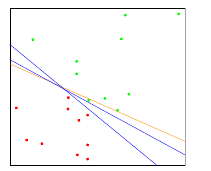

Fig.14. A toy example with two classes separable by a hyperplane. The orange line is the least squares solution, which misclassiﬁes one of the training points. Also shown are two blue separating hyperplanes found by the perceptron learning algorithm with diﬀerent random starts.


DataFrame head:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


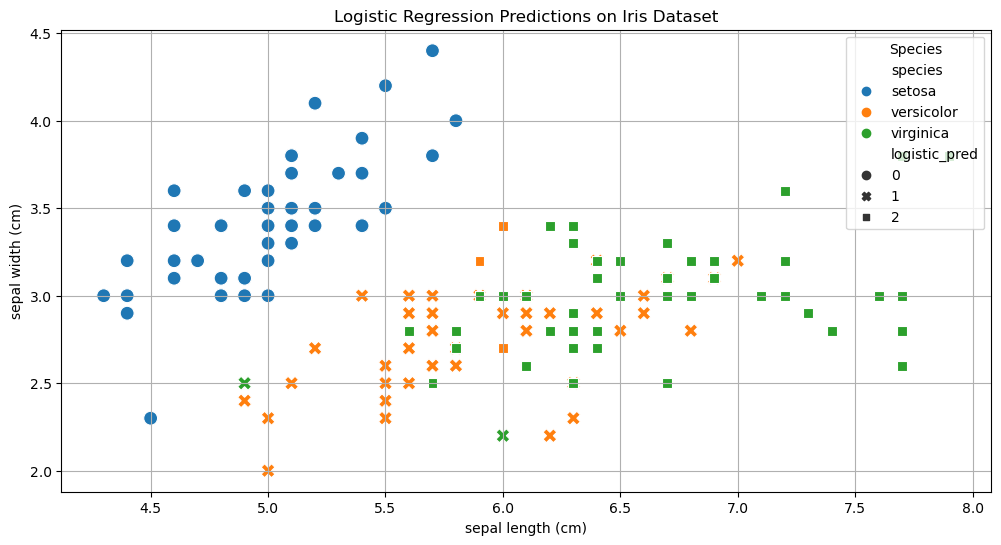

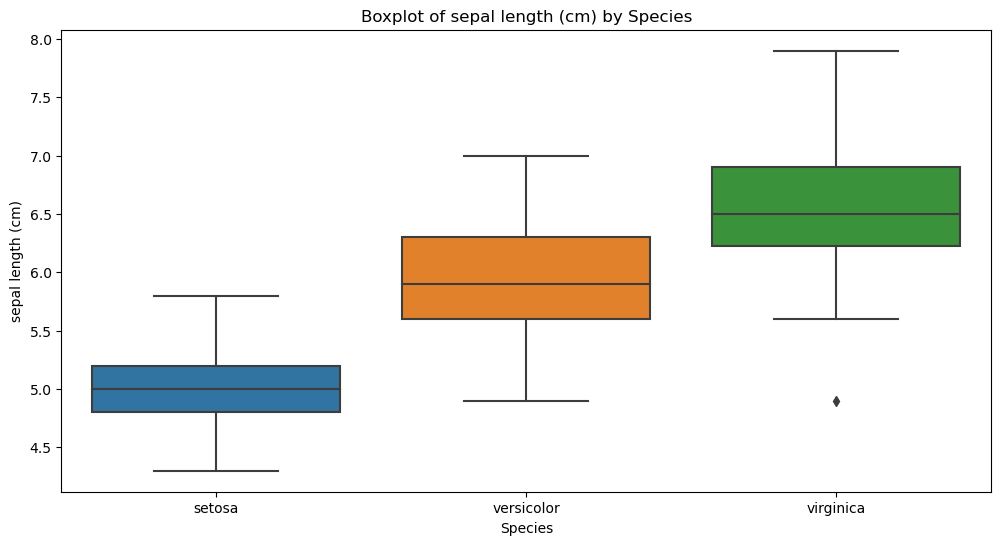

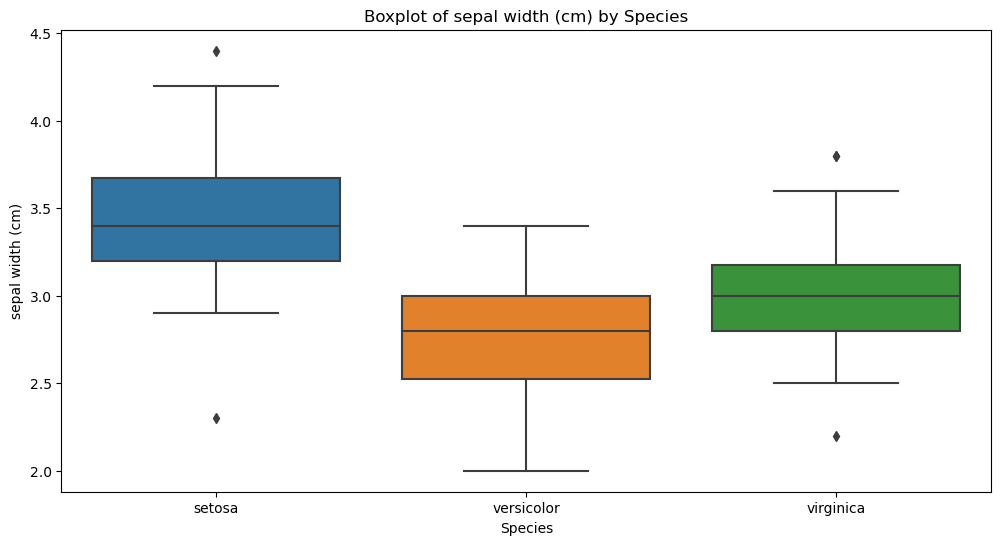


Logistic Regression Predictions:
   species  logistic_pred
0  setosa              0
1  setosa              0
2  setosa              0
3  setosa              0
4  setosa              0

LDA Predictions:
   species  lda_pred
0  setosa         0
1  setosa         0
2  setosa         0
3  setosa         0
4  setosa         0


In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data=X, columns=iris.feature_names)

# Map numeric species values to string labels for better readability
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = pd.Series(y).map(species_map)

# Display the DataFrame to ensure 'species' is added correctly
print("DataFrame head:\n", df.head())

# Fit Logistic Regression using One-vs-Rest
logistic_model = LogisticRegression(multi_class='ovr', max_iter=200)
logistic_model.fit(X, y)
df['logistic_pred'] = logistic_model.predict(X)

# Fit LDA
lda_model = LDA()
lda_model.fit(X, y)
df['lda_pred'] = lda_model.predict(X)

# Visualizations

# Scatter plot for first two features with species
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, 
                x=iris.feature_names[0], 
                y=iris.feature_names[1], 
                hue='species', 
                style='logistic_pred', 
                s=100)
plt.title('Logistic Regression Predictions on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Species', loc='best')
plt.grid(True)
plt.show()

# Boxplots for the first two features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='species', y=iris.feature_names[0])
plt.title(f'Boxplot of {iris.feature_names[0]} by Species')
plt.ylabel(iris.feature_names[0])
plt.xlabel('Species')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='species', y=iris.feature_names[1])
plt.title(f'Boxplot of {iris.feature_names[1]} by Species')
plt.ylabel(iris.feature_names[1])
plt.xlabel('Species')
plt.show()

# Display the predictions
print("\nLogistic Regression Predictions:\n", df[['species', 'logistic_pred']].head())
print("\nLDA Predictions:\n", df[['species', 'lda_pred']].head())


# Separating Hyperplanes

We have seen that **linear discriminant analysis** and **logistic regression** both estimate linear decision boundaries in similar but slightly different ways. For the rest of this chapter, we describe *separating hyperplane classifiers*. These procedures construct linear decision boundaries that explicitly try to separate the data into different classes as well as possible. They provide the basis for **support vector classifiers**, discussed in Chapter 12. The mathematical level of this section is somewhat higher than that of the previous sections.

Fig. 14 shows 20 data points in two classes in $\mathbb{R}^2$. These data can be separated by a linear boundary. Included in the figure (blue lines) are two of the infinitely many possible separating hyperplanes. The orange line is the least squares solution to the problem, obtained by regressing the $-1/1$ response $Y$ on $X$ (with intercept); the line is given by:

$$
\{x : \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 = 0\} \tag{4.39}
$$

This least squares solution does not do a perfect job in separating the points and makes one error. This is the same boundary found by **LDA**, in light of its equivalence with linear regression in the two-class case (Section 4.3 and Exercise 4.2). Classifiers such as (4.39), that compute a linear combination of the input features and return the sign, were called **perceptrons** in the engineering literature in the late 1950s (Rosenblatt, 1958). Perceptrons set the foundations for the **neural network models** of the 1980s and 1990s.

## Vector Algebra

Before we continue, let us digress slightly and review some vector algebra. Figure 4.15 depicts a *hyperplane* or affine set $L$ defined by the equation:

$$
f(x) = \beta_0 + \beta^T x = 0
$$

Since we are in $\mathbb{R}^2$, this is a line. Here we list some properties:

1. For any two points $x_1$ and $x_2$ lying in $L$, 
$$
\beta^T (x_1 - x_2) = 0
$$
   and hence $\beta^* = \beta/\|\beta\|$ is the vector normal to the surface of $L$.

2. For any point $x_0$ in $L$, 
$$
\beta^T x_0 = -\beta_0
$$

3. The signed distance of any point $x$ to $L$ is given by 
$$
\frac{1}{\|\beta\|} \beta^* (x - x_0) = \frac{\beta^T x + \beta_0}{\|\beta\|} = \frac{f(x)}{\|f'(x)\|} \tag{4.40}
$$

Hence, $f(x)$ is proportional to the signed distance from $x$ to the hyperplane defined by $f(x) = 0$.

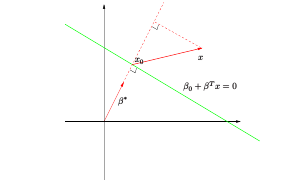
Fig. 15. The linear algebra of a hyperplane (aﬃne set).

# Optimal Separating Hyperplanes

The **optimal separating hyperplane** separates the two classes and maximizes the distance to the closest point from either class (**Vapnik, 1996**). This not only provides a unique solution to the separating hyperplane problem but also, by maximizing the margin between the two classes on the training data, leads to better classification performance on test data. We need to generalize criterion (4.41). Consider the optimization problem:

$$
\max_{\beta, \beta_0, \|\beta\| = 1} M \tag{4.45}
$$

subject to:

$$
y_i (x_i^T \beta + \beta_0) \geq M, \quad i = 1, \dots, N.
$$

These conditions ensure that all the points are at least a signed distance $M$ from the decision boundary defined by $\beta$ and $\beta_0$, and we seek the largest such $M$ and associated parameters. We can remove the $\|\beta\| = 1$ constraint by replacing the conditions with:

$$
\frac{1}{\|\beta\|} y_i (x_i^T \beta + \beta_0) \geq M, \tag{4.46}
$$

or equivalently:

$$
y_i (x_i^T \beta + \beta_0) \geq M \|\beta\|. \tag{4.47}
$$

Since any $\beta$ and $\beta_0$ satisfying these inequalities can be scaled, we can arbitrarily set $\|\beta\| = \frac{1}{M}$. Thus, (4.45) is equivalent to:

$$
\min_{\beta, \beta_0} \frac{1}{2} \|\beta\|^2 \tag{4.48}
$$

subject to:

$$
y_i (x_i^T \beta + \beta_0) \geq 1, \quad i = 1, \dots, N.
$$

In light of (4.40), the constraints define an empty slab or margin around the linear decision boundary with thickness $\frac{1}{\|\beta\|}$. Hence, we choose $\beta$ and $\beta_0$ to maximize this thickness. This is a convex optimization problem (quadratic criterion with linear inequality constraints). The **Lagrange (primal) function**, to be minimized with respect to $\beta$ and $\beta_0$, is:

$$
L_P = \frac{1}{2} \|\beta\|^2 - \sum_{i=1}^N \alpha_i \left[ y_i (x_i^T \beta + \beta_0) - 1 \right]. \tag{4.49}
$$

Setting the derivatives to zero, we obtain:

$$
\beta = \sum_{i=1}^N \alpha_i y_i x_i, \tag{4.50}
$$

$$
0 = \sum_{i=1}^N \alpha_i y_i, \tag{4.51}
$$

and substituting these into (4.49), we obtain the **Wolfe dual**:

$$
L_D = \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{k=1}^N \alpha_i \alpha_k y_i y_k x_i^T x_k \tag{4.52}
$$

subject to $\alpha_i \geq 0$ and $\sum_{i=1}^N \alpha_i y_i = 0$. The solution is obtained by maximizing $L_D$ in the positive orthant, a simpler convex optimization problem for which standard software can be used.

Additionally, the solution must satisfy the **Karush–Kuhn–Tucker conditions**, which include (4.50), (4.51), (4.52), and:

$$
\alpha_i \left[ y_i (x_i^T \beta + \beta_0) - 1 \right] = 0, \quad \forall i. \tag{4.53}
$$

From these conditions:
- If $\alpha_i > 0$, then $y_i (x_i^T \beta + \beta_0) = 1$, meaning $x_i$ lies on the boundary of the slab.
- If $y_i (x_i^T \beta + \beta_0) > 1$, then $x_i$ is not on the boundary, and $\alpha_i = 0$.

From (4.50), we see that the solution vector $\beta$ is defined as a linear combination of the **support points** $x_i$ — the points on the boundary of the slab where $\alpha_i > 0$. Likewise, $\beta_0$ is obtained by solving (4.53) for any of the support points.

The **optimal separating hyperplane** produces a function:

$$
\hat{f}(x) = x^T \hat{\beta} + \hat{\beta}_0
$$

for classifying new observations:

$$
\hat{G}(x) = \text{sign}\left(\hat{f}(x)\right). \tag{4.54}
$$

Although none of the training observations fall into the margin (by construction), this will not necessarily be the case for test observations.

**Figure 16** shows the same data as in Figure 14. The shaded region delineates the maximum margin separating the two classes, with three support points lying on the boundary of the margin. The optimal separating hyperplane (blue line) bisects the slab, and the boundary found using logistic regression (red line) is also shown for comparison. The two boundaries are close to each other (see Section 12.3.3).

The intuition is that a large margin on the training data will lead to good separation on the test data. The description of the solution in terms of support points suggests that the optimal hyperplane focuses more on the points that matter and is more robust to **model misspecification**. However, the **LDA** solution depends on all the data, including points far from the decision boundary. Note that identifying the support points requires using all the data.

If the classes are Gaussian, **LDA** is optimal, and separating hyperplanes may over-focus on noisier data at the class boundaries. Included in **Figure 4.16** is the logistic regression solution fit by maximum likelihood. Both solutions are similar in this case.

When a separating hyperplane exists, logistic regression will always find it, as the log-likelihood can be driven to zero in this case (Exercise 4.5). Logistic regression shares some qualitative features with the separating hyperplane solution. The coefficient vector is defined by a weighted least squares fit of a zero-mean linearized response on the input features, with larger weights for points near the decision boundary.

When the data are not separable, there is no feasible solution to this problem, and an alternative formulation is needed. Enlarging the space using **basis transformations** can lead to **overfitting** through artificial separation. In Chapter 12, we discuss a more attractive alternative known as the **support vector machine**, which allows for overlap but minimizes a measure of the extent of this overlap.


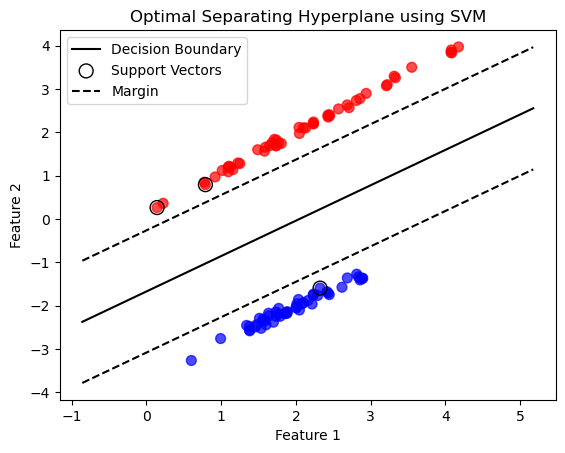

In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, class_sep=2, random_state=42)

# Convert labels to -1 and 1 (as per the description in your problem)
y = np.where(y == 0, -1, 1)

# Step 2: Train an SVM classifier
clf = svm.SVC(kernel='linear')  # Linear kernel for optimal hyperplane
clf.fit(X, y)

# Step 3: Visualize the separating hyperplane
# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]
slope = -w[0] / w[1]
intercept = -b / w[1]

# Create a meshgrid for plotting decision boundary
xx = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
yy = slope * xx + intercept

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, alpha=0.7)
plt.plot(xx, yy, 'k-', label='Decision Boundary')

# Mark support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Highlight the margin (distance from hyperplane)
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_upper = yy + margin
yy_lower = yy - margin
plt.plot(xx, yy_upper, 'k--', label='Margin')
plt.plot(xx, yy_lower, 'k--')

plt.legend()
plt.title('Optimal Separating Hyperplane using SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


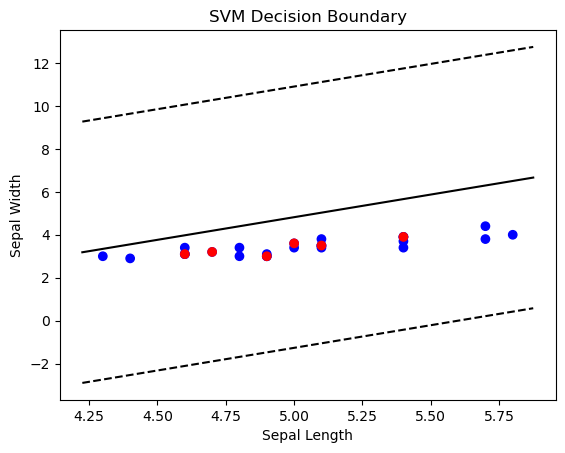

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Iris dataset manually (Subset: Two classes for binary classification)
# Features: Sepal length, Sepal width, Petal length, Petal width
# Classes: 0 = Setosa, 1 = Versicolor (Two class problem for binary classification)
iris_data = np.array([
    [5.1, 3.5, 1.4, 0.2, 0], [4.9, 3.0, 1.4, 0.2, 0], [4.7, 3.2, 1.3, 0.2, 0],
    [4.6, 3.1, 1.5, 0.2, 0], [5.0, 3.6, 1.4, 0.2, 0], [5.4, 3.9, 1.7, 0.4, 0],
    [4.6, 3.4, 1.4, 0.3, 0], [5.0, 3.4, 1.5, 0.2, 0], [4.4, 2.9, 1.4, 0.2, 0],
    [4.9, 3.1, 1.5, 0.1, 0], [5.4, 3.7, 1.5, 0.2, 0], [4.8, 3.4, 1.6, 0.2, 0],
    [4.8, 3.0, 1.4, 0.1, 0], [4.3, 3.0, 1.1, 0.1, 0], [5.8, 4.0, 1.2, 0.2, 0],
    [5.7, 4.4, 1.5, 0.4, 0], [5.4, 3.9, 1.3, 0.4, 0], [5.1, 3.5, 1.4, 0.3, 0],
    [5.7, 3.8, 1.7, 0.3, 0], [5.1, 3.8, 1.5, 0.3, 0], [5.4, 3.4, 1.7, 0.2, 0],
    [4.9, 3.0, 1.4, 0.2, 0], [4.6, 3.1, 1.5, 0.2, 0], [5.1, 3.4, 1.5, 0.2, 0],
    [5.1, 3.5, 1.4, 0.2, 1], [4.9, 3.0, 1.4, 0.2, 1], [4.7, 3.2, 1.3, 0.2, 1],
    [4.6, 3.1, 1.5, 0.2, 1], [5.0, 3.6, 1.4, 0.2, 1], [5.4, 3.9, 1.7, 0.4, 1]
])

X = iris_data[:, :2]  # Taking the first two features for 2D visualization (sepal length and sepal width)
y = iris_data[:, -1]  # Class labels

# Convert labels to -1 and 1 (as required for SVM)
y = np.where(y == 0, -1, 1)

# Step 2: Implementing SVM using Gradient Descent
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Gradient Descent to update w and b
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)

# Step 3: Train the SVM
svm = SVM()
svm.fit(X, y)

# Step 4: Plotting the decision boundary and data points
def visualize_svm():
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, cmap='bwr')

    # Generate decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    xx = np.linspace(xlim[0], xlim[1], 100)
    yy = -(svm.w[0] * xx + svm.b) / svm.w[1]
    plt.plot(xx, yy, 'k-')

    # Support vectors (Approximation, since we don't have kernel trick here)
    margin = 1 / np.linalg.norm(svm.w)
    yy_upper = yy + margin
    yy_lower = yy - margin
    plt.plot(xx, yy_upper, 'k--')
    plt.plot(xx, yy_lower, 'k--')

    plt.title('SVM Decision Boundary')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

visualize_svm()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests

# Load the Iris dataset from an online source
def load_iris_dataset():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    response = requests.get(url)
    data = response.text.strip().split('\n')
    
    # Prepare the data
    X = []
    y = []
    for line in data:
        parts = line.split(',')
        X.append([float(parts[0]), float(parts[1])])  # Only use the first two features
        # Map 'Iris-virginica' to 1 and others to -1
        if parts[4] == 'Iris-virginica':
            y.append(1)
        else:
            y.append(-1)
    
    return np.array(X), np.array(y)

# Simple SVM training using the Pegasos algorithm
def svm_train(X, y, learning_rate=0.01, num_iterations=1000):
    n_samples, n_features = X.shape
    alpha = np.zeros(n_samples)  # Initialize alpha values
    b = 0  # Initialize bias

    for _ in range(num_iterations):
        for i in range(n_samples):
            # Compute the decision value for the current sample
            decision_value = np.dot(X[i], alpha * y) + b
            
            # Update rules for the SVM
            if y[i] * decision_value < 1:
                alpha[i] += learning_rate * (1 - y[i] * decision_value)
                b += learning_rate * y[i]
    
    return alpha, b

# SVM prediction
def svm_predict(X, alpha, b):
    decision_values = np.dot(X, alpha) + b  # Use the correct dimensions
    return np.sign(decision_values)

# Confusion matrix calculation
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    tn = np.sum((y_true == -1) & (y_pred == -1))  # True Negatives
    fp = np.sum((y_true == -1) & (y_pred == 1))  # False Positives
    fn = np.sum((y_true == 1) & (y_pred == -1))  # False Negatives
    return tp, tn, fp, fn

# Plotting decision boundary
def plot_decision_boundary(X, y, alpha, b):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50, alpha=0.7)

    # Create a grid for the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Calculate the decision function for the grid
    Z = np.zeros(xx.shape)
    for i in range(len(xx)):
        for j in range(len(xx[0])):
            sample = np.array([xx[i, j], yy[i, j]])
            # Compute the decision function value for the grid points
            Z[i, j] = np.dot(sample, alpha) + b

    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.1, colors=['blue', 'red'])

    plt.title('SVM Decision Boundary')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load dataset
    X, y = load_iris_dataset()

    # Train SVM
    alpha, b = svm_train(X, y)

    # Make predictions
    y_pred = svm_predict(X, alpha, b)

    # Confusion matrix
    tp, tn, fp, fn = confusion_matrix(y, y_pred)
    print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")

    # Plot decision boundary
    plot_decision_boundary(X, y, alpha, b)


In [ ]:
## Domeisions Mismatch ====== Complete it